# Literature Analyses

This notebook analyses the collected and curated literature data for the aperiodic-clinical project. 

In [271]:
from pathlib import Path
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from lisc.plts.words import plot_years

In [272]:
import seaborn as sns
sns.set_context('paper')

## Functions

In [273]:
def plot_hist(df, column, figsize=(3, 3), **kwargs):
    """Helper function to plot a histogram of data."""
    
    # Settings
    color = None
    shrink = 0.8
    
    plt.figure(figsize=figsize)
    hist = sns.histplot(df, x=column, shrink=shrink, color=color, **kwargs)
    hist.set_xticks(hist.get_xticks())  
    hist.set_xticklabels(hist.get_xticklabels(), rotation=45, ha='right');

In [274]:
# Helper function for sub-selecting a minimum number of values
def min_count(df, column, min_value):
    return df.groupby(column).filter(lambda x : len(x) > min_value)

## Load the Data

In [275]:
# Set the file name
file_foler = Path('../data/')
file_name = 'apc_data.csv'

In [276]:
# Load the data
df = pd.read_csv(file_foler / file_name, skiprows=[0])

In [277]:
# Check the columns
df.columns

Index(['Disorder', 'Authors', 'Year', 'Month', 'DOI', 'Title', 'Journal',
       'Data', 'Analyzed Data', 'Amount of Data', 'Design', 'Analysis',
       '# Patients', 'Patient Ages', '# Control', 'Control Ages', 'Fit Method',
       'Fit Range', 'Settings Reporting', 'Report GOF', 'Clinical EXP',
       'Control EXP', 'Reported Finding for
Aperiodic Exponent',
       'Report Effects Size', 'Effect Size Measure', 'Effects Size',
       'Biomarker', 'Interpretation', 'Notes'],
      dtype='object')

#### Clean up the loaded data

In [278]:
# Drop the null rows
df = df.dropna()

#### Manage column types

In [279]:
# Set years as integers
df['Year'] = df['Year'].astype('int')


In [280]:
# For months - set missing data as '1', and typecast to int
df['Month'].values[df['Month'].values == '-'] = '1'
df['Month'] = df['Month'].astype('int')

In [281]:
#
df['# Control'].values[df['# Control'] == '-'] = np.nan

In [ ]:
mel_count=a['Names'].str.contains('Mel').sum()

In [291]:
df[df['# Patients'].str.contains('\u202869')]['# Patients']

7    107
69
Name: # Patients, dtype: object

In [285]:
'\u202869' == df['# Patients'].values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [282]:
df['# Patients'] = df['# Patients'].astype('int')
#df['# Control'] = df['# Control'].astype('int')

ValueError: invalid literal for int() with base 10: '107\u202869'

#### Check loaded dataframe

In [201]:
# Check some example rows
df.head(3)

,Disorder,Authors,Year,Month,DOI,Title,Journal,Data,Analyzed Data,Amount of Data,...,Report GOF,Clinical EXP,Control EXP,Reported Finding for Aperiodic Exponent,Report Effects Size,Effect Size Measure,Effects Size,Biomarker,Interpretation,Notes
1,ADHD,Robertson et al,2019,10,10.1152/jn.00388.2019,EEG Power Spectral Slope differs by ADHD statu...,Journal of Neurophysiology,EEG,resting,7m,...,no,1.67 +/- 0.27,1.51 +/- 0.32,⬆︎ clinical group,yes,eta-squared,0.088,yes,E/I ratio,Are multiple datasets / subsets included and a...
2,ADHD,Pertermann et al,2019,8,10.1016/j.bpsc.2019.03.011,The Modulation of Neural Noise Underlies the E...,Biological Psychiatry: Cognitive Neuroscience ...,EEG,task,1s,...,-,unclear,unclear,⬇︎ clinical group ⬆︎ w drug treatment,no,-,-,no,neural noise,Measurement is a little unclear - is a “neural...
3,ADHD,Ostlund et al,2021,4,10.1016/j.dcn.2021.100931,Behavioral and cognitive correlates of the ape...,Developmental Cognitive Neuroscience,EEG,resting,8m,...,no,unclear,unclear,⬇︎ clinical group,no,-,-,no,E/I ratio,Also report that exponent relates to reaction ...


## Disorders

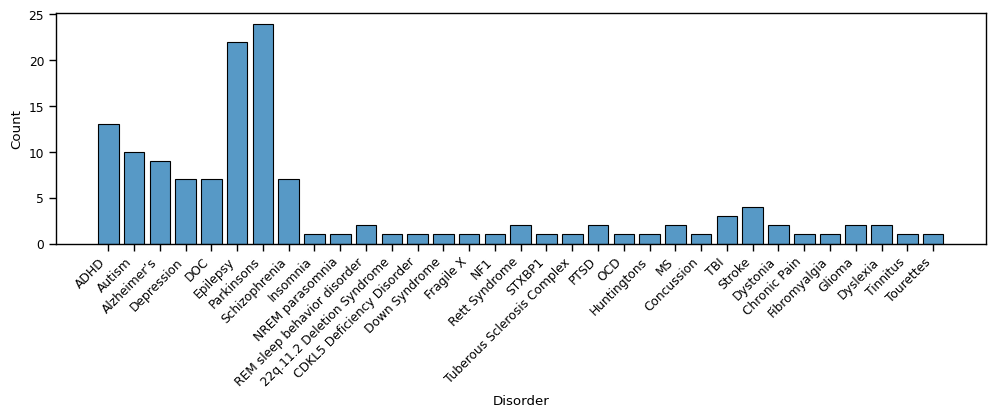

In [202]:
# Plot the histogram of disorders
plot_hist(df, 'Disorder', figsize=(12, 3))

## Publication Data

In [142]:
# Compute the counts per journal
journal_counts = Counter(df['Journal'].values)

In [143]:
n_preprints = journal_counts.pop('preprint')
print('Number of preprints: {}'.format(n_preprints))

Number of preprints: 15


In [144]:
# Check the number of journals
n_journals = len(journal_counts)
print('Number of journals: {}'.format(n_journals))

Number of journals: 78


In [145]:
# Check the most common journals
journal_counts.most_common(5)

[('Scientific Reports', 5),
 ('Brain Communications', 5),
 ("NPJ Parkinson's Disease", 4),
 ('Journal of Neurophysiology', 3),
 ('Cerebral Cortex', 3)]

### Publication Years

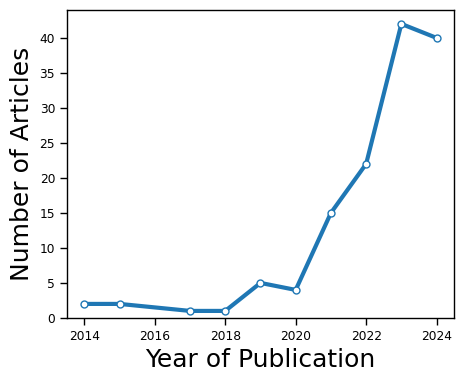

In [175]:
# Plot counts by years
#   Note: the 2024 value in this plot is a 6 months range 
year_counts = Counter(df['Year'])
plot_years(year_counts, year_range=[2014, 2024], figsize=(5, 4))

In [177]:
# Create version of years split by 6 months
half_years = df['Year'].values + (df['Month'] > 6) * 0.5
half_year_counter = Counter(half_years)

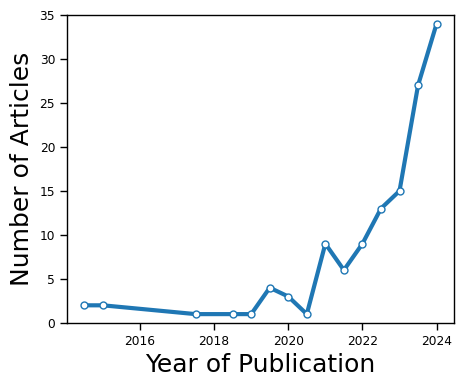

In [179]:
# Plot the reports across years, with 6 month datapoints
plot_years(half_year_counter, year_range=[2014, 2024], figsize=[5, 4])

## Recording Information

### Data Modality

In [181]:
# Set order of the methods for plotting
df['Data'] = pd.Categorical(\
    df['Data'], ['EEG','MEG','DBS','iEEG', 'RNS'])

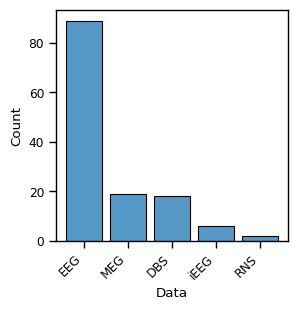

In [182]:
# Plot the histogram of data modalities
plot_hist(df, 'Data')

### Analyzed Data

In [ ]:
# Plot histogram of analyzed data
plot_hist(df, 'Analyzed Data')

## Dataset Information

## Method Information

### Fit Methods

In [204]:
# Set order of the methods for plotting
df['Fit Method'] = pd.Categorical(\
    df['Fit Method'], ['specparam','regression','irasa','Colombo', 'eBOSC', 'Bódizs', 'unclear'])

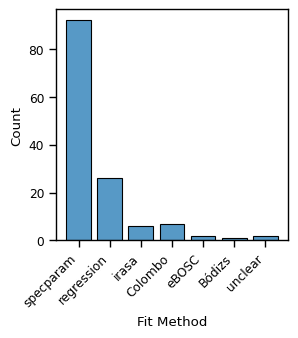

In [205]:
# Plot the histogram of fit methods
plot_hist(df, 'Fit Method')

## Results Information

### Interpretation

In [194]:
# Set order of the methods for plotting
df['Interpretation'] = pd.Categorical(\
    df['Interpretation'], ['E/I ratio', 'slowing', 'neural noise', 'oscillations',
                           'synchronicity', 'complexity', 'criticality', 
                           'timescale', 'integration', 'neurotransmission', 'unclear'])

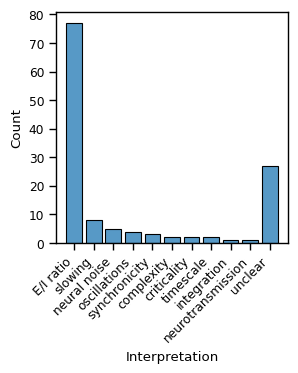

In [195]:
# Plot histogram of interpretations
plot_hist(df, 'Interpretation')

In [197]:
# Set order of the methods for plotting
df['Interpretation'] = pd.Categorical(\
    df['Interpretation'], ['E/I ratio', 'slowing', 'neural noise', 'oscillations',
                           'synchronicity', 'unclear'])

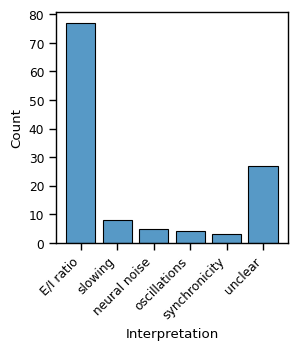

In [199]:
# Plot histogram of interpretations - sub-selected
plot_hist(min_count(df, 'Interpretation', 2), 'Interpretation')

### Biomarker

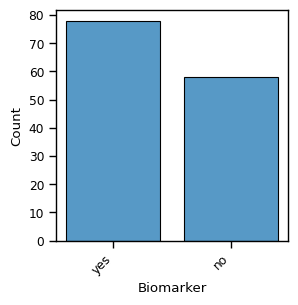

In [206]:
# Plot histogram of biomarker
plot_hist(df, 'Biomarker')

### Report Values

In [243]:
# Get the subset of rows that report a clinical exponent 
dfr = df[np.logical_and(df['Clinical EXP'] != '-', df['Clinical EXP'] != 'unclear')]
len(dfr)

26

### Effect Size

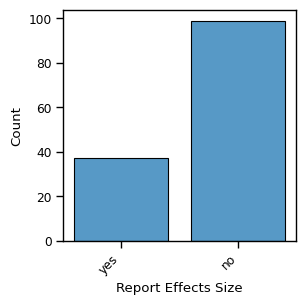

In [246]:
# Plot histogram of effect size
plot_hist(df, 'Report Effects Size')

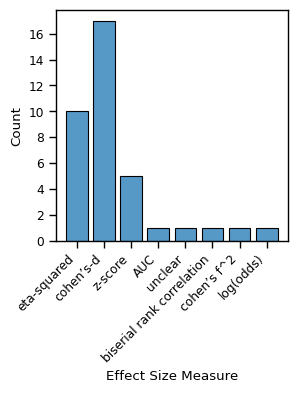

In [247]:
# Plot histogram of effect size - subselected for those that report
dfe = df[df['Effect Size Measure'] != '-']
plot_hist(dfe, 'Effect Size Measure')